<a href="https://colab.research.google.com/github/GokulGS/CloudComputing/blob/main/220579243_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26787 sha256=b2635a9d32b45363e4c9f24a87124cee10be6730b8fe5d70f7b8f9096ef90186
  Stored in directory: /root/.cache/pip/wheels/ed/8f/46/a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built pandasql


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from pandas import Series
from datetime import datetime
from google.colab import drive
from pandasql import sqldf
drive.mount('/content/gdrive')

pysqldf = lambda q: sqldf(q, globals())

Mounted at /content/gdrive


In [3]:
data1=pd.read_csv('/content/gdrive/MyDrive/Cloud_computing/application-checkpoints.csv')
data2=pd.read_csv('/content/gdrive/MyDrive/Cloud_computing/task-x-y.csv')
data3=pd.read_csv('/content/gdrive/MyDrive/Cloud_computing/gpu.csv')


In [4]:
q1="""select timestamp,hostname,eventName,eventType,jobId,taskId,count(*) from data1 group by 1,2,3,4,5,6 having count(*)>1;"""
dup_rec=pysqldf(q1)

In [5]:
q2="""select timestamp,hostname,eventName,eventType,jobId,taskId,count(*) from data1 group by 1,2,3,4,5,6 having count(*)=1;"""
non_dup_rec=pysqldf(q2)


In [6]:
q1_3="""select timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc,count(*) from data3 group by 1,2,3,4,5,6,7,8 having count(*)>1;"""
dup_rec3=pysqldf(q1_3)

In [7]:
q1_4="""select timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc,count(*) from data3 group by 1,2,3,4,5,6,7,8 having count(*)=1;"""
non_dup_rec3=pysqldf(q1_4)

In [122]:
from pandas.io.parsers.readers import csv
from os import write
cdata3=non_dup_rec3.iloc[:,:8].append(dup_rec3.iloc[:,:8])
cdata3["gpuSerial"]=cdata3["gpuSerial"].astype('string')
cdata3["timestamp"]=cdata3["timestamp"].astype('datetime64')

In [9]:
from pandas.io.parsers.readers import csv
from os import write
cdata1=non_dup_rec.iloc[:,:6].append(dup_rec.iloc[:,:6])



In [ ]:
#from google.colab import files
#cdata1.to_csv('cdata1.csv', encoding = 'utf-8-sig') 
#files.download('cdata1.csv')

In [10]:
q3="""select timestamp,hostname,eventName,eventType,jobId,taskId,count(*) from cdata1 group by 1,2,3,4,5,6 having count(*)>1;"""
dup_chek=pysqldf(q3)

dup_chek

,timestamp,hostname,eventName,eventType,jobId,taskId,count(*)


In [11]:
from pandas.core.reshape.api import pivot_table
q5 ="""select * from cdata1 where eventName='TotalRender' and eventType='START' ;"""

q5=pysqldf(q5)
q5["timestamp"]=q5["timestamp"].astype('datetime64')

print(q5.index)


RangeIndex(start=0, stop=65793, step=1)


In [12]:
q6 ="""select * from cdata1 where eventName='TotalRender' and eventType='STOP' ;"""

q6=pysqldf(q6)
q6["timestamp"]=q6["timestamp"].astype('datetime64')


In [13]:
q4 ="""select * from cdata1 inner join data2 on cdata1.taskId = data2.taskId;"""
data1_2=pysqldf(q4)

data1_2["start_dttm"]=data1_2["timestamp"].astype('datetime64')



In [14]:
q7 ="""select q11.timestamp as start_dttm,q12.timestamp as end_dttm,q11.taskId taskId,q11.jobId jobId, q11.hostname, q11.eventName from (select * from cdata1 where  eventType='START') q11 inner join 
(select * from cdata1 where  eventType='STOP') q12 on q11.jobId=q12.jobId and q11.taskId=q12.taskId and q11.eventName=q12.eventName ;"""

q_1_4=pysqldf(q7)
q_1_4["start_dttm"]=q_1_4["start_dttm"].astype('datetime64')
q_1_4["end_dttm"]=q_1_4["end_dttm"].astype('datetime64')
q_1_4['delta_dttm']=q_1_4['end_dttm']-q_1_4['start_dttm']

# arranging in descending order
q_1_4=q_1_4.sort_values(by='delta_dttm', ascending=False)


In [112]:
q_1_4

,start_dttm,end_dttm,taskId,jobId,hostname,eventName,delta_dttm
3934,2018-11-08 07:42:10.593,2018-11-08 07:43:44.290,ef15022d-f816-4434-b41e-709cb996bc08,1024-lvl8-5ad819e1-fbf2-42e0-8f16-a3baca825a63,0745914f4de046078517041d70b22fe7000015,TotalRender,0 days 00:01:33.697000
4872,2018-11-08 07:42:14.867,2018-11-08 07:43:44.392,76fb8e93-c3a6-456c-9661-3b7407800027,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,b9a1fa7ae2f74eb68f25f607980f97d700000O,TotalRender,0 days 00:01:29.525000
5077,2018-11-08 07:42:16.024,2018-11-08 07:43:44.248,83064f91-5a19-4526-8673-38ab28dd3ab7,1024-lvl8-5ad819e1-fbf2-42e0-8f16-a3baca825a63,265232c5f6814768aeefa66a7bec6ff6000000,TotalRender,0 days 00:01:28.224000
170547,2018-11-08 08:06:34.096,2018-11-08 08:07:56.607,a95d501e-d5d5-4fb4-9119-98120bf6f4d5,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,0d56a730076643d585f77e00d2d8521a00000I,TotalRender,0 days 00:01:22.511000
170550,2018-11-08 08:06:34.098,2018-11-08 08:07:55.606,a95d501e-d5d5-4fb4-9119-98120bf6f4d5,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,0d56a730076643d585f77e00d2d8521a00000I,Render,0 days 00:01:21.508000
...,...,...,...,...,...,...,...
144697,2018-11-08 08:02:46.737,2018-11-08 08:02:46.739,2f463f95-5caf-49d4-8431-0e012d3bbdc2,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,04dc4e9647154250beeee51b866b0715000000,Saving Config,0 days 00:00:00.002000
253343,2018-11-08 08:18:42.859,2018-11-08 08:18:42.861,6e189eb0-f132-45e7-bbe8-cc01aa561e50,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,04dc4e9647154250beeee51b866b0715000016,Saving Config,0 days 00:00:00.002000
253340,2018-11-08 08:18:42.857,2018-11-08 08:18:42.859,39abddb0-566e-45e4-9cc6-b36add181ba3,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,04dc4e9647154250beeee51b866b071500000U,Saving Config,0 days 00:00:00.002000
144708,2018-11-08 08:02:46.742,2018-11-08 08:02:46.744,e8a7ccb0-be6a-4242-a9ba-1435400b3eba,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,cd44f5819eba427a816e7ce648adceb200000D,Saving Config,0 days 00:00:00.002000


In [ ]:
q8 = """select * from q_1_4 where eventName = 'Render'"""
render=pysqldf(q8)
render["start_dttm"]=render["start_dttm"].astype('datetime64')
render["end_dttm"]=render["end_dttm"].astype('datetime64')
render['delta_dttm']=render['end_dttm']-render['start_dttm']
render=render.sort_values(by='delta_dttm', ascending=False)
render

In [ ]:
q9 = """select * from q_1_4 where eventName = 'Saving Config'"""
saveconfig=pysqldf(q9)
saveconfig["start_dttm"]=saveconfig["start_dttm"].astype('datetime64')
saveconfig["end_dttm"]=saveconfig["end_dttm"].astype('datetime64')
saveconfig['delta_dttm']=saveconfig['end_dttm']-saveconfig['start_dttm']
saveconfig=saveconfig.sort_values(by='delta_dttm', ascending=False)
saveconfig


In [ ]:
q10 = """select * from q_1_4 where eventName = 'Tiling'"""
Tiling=pysqldf(q10)
Tiling["start_dttm"]=Tiling["start_dttm"].astype('datetime64')
Tiling["end_dttm"]=Tiling["end_dttm"].astype('datetime64')
Tiling['delta_dttm']=Tiling['end_dttm']-Tiling['start_dttm']
Tiling=Tiling.sort_values(by='delta_dttm', ascending=False)
Tiling


In [ ]:
q10 = """select * from q_1_4 where eventName = 'Uploading'"""
Uploading=pysqldf(q10)
Uploading["start_dttm"]=Uploading["start_dttm"].astype('datetime64')
Uploading["end_dttm"]=Uploading["end_dttm"].astype('datetime64')
Uploading['delta_dttm']=Uploading['end_dttm']-Uploading['start_dttm']
Uploading=Uploading.sort_values(by='delta_dttm', ascending=False)
Uploading


In [16]:
q4 ="""select q_1_4.*, data2.x, data2.y, data2.level from q_1_4 inner join data2 on q_1_4.taskId = data2.taskId where q_1_4.eventName not like '%TotalRender%';"""
data1_2=pysqldf(q4)

data1_2["start_dttm"]=data1_2["start_dttm"].astype('datetime64')
data1_2["end_dttm"]=data1_2["end_dttm"].astype('datetime64')
data1_2['delta_dttm']=data1_2['end_dttm']-data1_2['start_dttm']

# arranging in descending order
data1_2=data1_2.sort_values(by='delta_dttm', ascending=False)


/usr/local/lib/python3.8/dist-packages/pandas/io/sql.py:717: UserWarning: the 'timedelta' type is not supported, and will be written as integer values (ns frequency) to the database.
  pandas_sql.to_sql(


In [17]:
data1_2['Avg_Time(in Seconds)'] = data1_2['delta_dttm'].dt.total_seconds()

data1_2.groupby('eventName', as_index=False)['Avg_Time(in Seconds)'].mean()


,eventName,Avg_Time(in Seconds)
0,Render,41.208220
1,Saving Config,0.002476
2,Tiling,0.973207
3,Uploading,1.393641


In [18]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
      plt.text(i, 0.2+y.iloc[i],round(y.iloc[i],2), ha = 'center',weight='bold') 
    

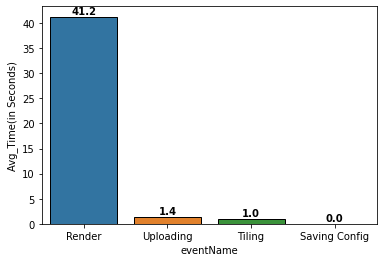

In [19]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (0.50)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center",weight='bold') 
                

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

#p = sns.barplot('eventName', 'Avg_Time(in Seconds)', data=data1_2, ci=False)
ax = sns.barplot(x='eventName', y='Avg_Time(in Seconds)', data=data1_2,errwidth=0,edgecolor = 'black')
 
#show values on barplot
show_values(ax)


In [95]:
data1_2['TotalTime'] = data1_2['delta_dttm'].dt.total_seconds()
toptask=data1_2.groupby(['taskId','x','y'], as_index=False)['TotalTime'].sum()
toptask=toptask.sort_values(['TotalTime'], ascending=False)
toptask

,taskId,x,y,TotalTime
61474,ef15022d-f816-4434-b41e-709cb996bc08,3,7,94.695
30697,76fb8e93-c3a6-456c-9661-3b7407800027,70,6,90.351
33805,83064f91-5a19-4526-8673-38ab28dd3ab7,14,1,89.292
43629,a95d501e-d5d5-4fb4-9119-98120bf6f4d5,91,105,83.498
9602,25b410b5-f5ef-4a2f-8b21-29175bca35fc,92,106,82.388
...,...,...,...,...
20337,4f258d1b-8fab-40af-bc9d-66aa3384545e,35,11,24.156
2160,0849dfbf-51a2-43d3-b0e4-bfa11f830010,30,21,24.148
17795,4573fe4d-88dd-4913-b8ab-41ae85bf038a,11,22,24.143
26118,654165fc-7fe5-4bd6-b0ba-557e3545c2e5,27,9,24.113


In [80]:
#sns.scatterplot(data=toptask, x="x", y="y", hue="TotalTime", size="TotalTime",sizes=(10, 400), legend="full")

AttributeError: ignored

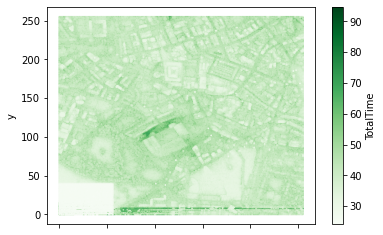

In [102]:
toptask.plot.scatter(x='x',y='y', c='TotalTime',s=0.5, cmap='Greens')


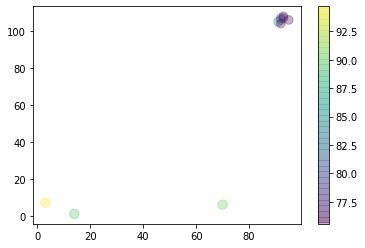

In [ ]:
rng = np.random.RandomState(0)
x = toptask.x
y = toptask.y
colors = toptask.TotalTime
sizes = toptask.TotalTime

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

In [117]:
avghostpower=cdata3.groupby('hostname', as_index=False)['powerDrawWatt'].mean()
avghostpower=avghostpower.sort_values(['powerDrawWatt'], ascending=False).head(10)
avghostpower

,hostname,powerDrawWatt
687,a77ef58b13ad4c01b769dac8409af3f800000D,106.247462
904,db871cd77a544e13bc791a64a0c8ed5000000U,101.974324
37,04dc4e9647154250beeee51b866b0715000011,101.549633
441,5903af3699134795af7eafc605ae5fc700000H,99.057575
616,8b6a0eebc87b4cb2b0539e81075191b9000016,98.698678
44,04dc4e9647154250beeee51b866b0715000018,98.250353
357,4ad946d4435c42dabb5073531ea4f31500000X,98.150566
537,83ea61ac1ef54f27a3bf7bd0f41ecaa700000D,97.795836
412,4c72fae95b9147189a0559269a6953ff000012,97.771817
57,0745914f4de046078517041d70b22fe7000007,97.535805


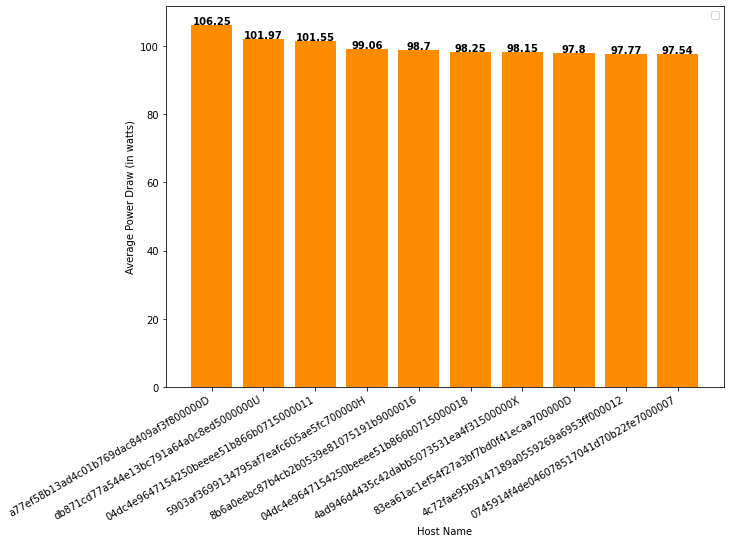

In [118]:
plt.figure(figsize = (10, 7))
plt.bar(avghostpower.hostname, avghostpower.powerDrawWatt, color='darkorange')

addlabels(avghostpower.hostname, avghostpower.powerDrawWatt)
plt.plot()
plt.xticks(rotation=30, ha='right')

plt.xlabel("Host Name")
plt.ylabel("Average Power Draw (in watts)")
plt.title("")
plt.legend()
plt.show()


In [115]:
avgtemp=cdata3.groupby('gpuSerial', as_index=False)['gpuTempC'].mean()
avgtemp=avgtemp.sort_values(['gpuTempC'], ascending=False).head(10)
avgtemp

,gpuSerial,gpuTempC
556,323617043033,48.926716
447,323617021463,48.153231
940,325217084671,48.128925
88,323217055992,48.008672
130,323217056368,47.523046
278,323617020525,47.379081
474,323617042479,47.255163
680,325017017810,47.247498
517,323617042764,47.109333
491,323617042596,47.088608


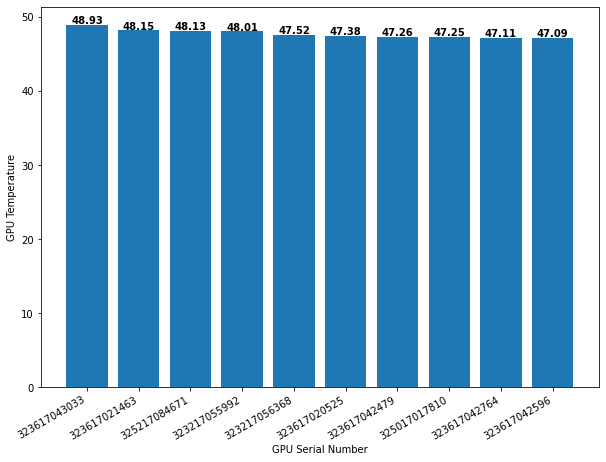

In [108]:
x = avgtemp.gpuSerial
y = avgtemp.gpuTempC
# setting figure size by using figure() function 
plt.figure(figsize = (10, 7))

plt.bar(x, y)
# calling the function to add value labels
addlabels(x, y)

plt.xticks(rotation=30, ha='right')
plt.xlabel("GPU Serial Number")
plt.ylabel("GPU Temperature")
plt.show()

In [153]:
rel=cdata3.groupby('gpuSerial', as_index=False)['gpuUtilPerc','gpuMemUtilPerc'].mean()
rel=rel.sort_values(['gpuUtilPerc'], ascending=False)
rel.index

<ipython-input-153-543314f365aa>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rel=cdata3.groupby('gpuSerial', as_index=False)['gpuUtilPerc','gpuMemUtilPerc'].mean()


Int64Index([833, 405, 814, 708, 491, 904, 545, 112,  37, 879,
            ...
            875, 207, 248, 430, 347, 263, 108, 389, 407, 328],
           dtype='int64', length=1024)

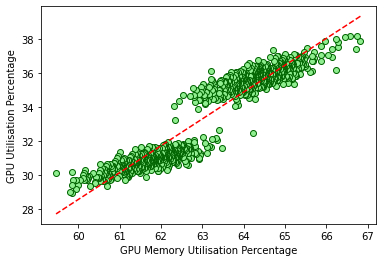

In [158]:
plt.scatter(x=rel.gpuUtilPerc, y=rel.gpuMemUtilPerc, c = 'lightgreen', edgecolor = 'darkgreen');
plt.xlabel("GPU Memory Utilisation Percentage")
plt.ylabel("GPU Utilisation Percentage")
z = np.polyfit(rel.gpuUtilPerc, rel.gpuMemUtilPerc, 1)
p = np.poly1d(z)
plt.plot(rel.gpuUtilPerc,p(rel.gpuUtilPerc),"r--")
plt.show()

In [113]:
q_1_4

,start_dttm,end_dttm,taskId,jobId,hostname,eventName,delta_dttm
3934,2018-11-08 07:42:10.593,2018-11-08 07:43:44.290,ef15022d-f816-4434-b41e-709cb996bc08,1024-lvl8-5ad819e1-fbf2-42e0-8f16-a3baca825a63,0745914f4de046078517041d70b22fe7000015,TotalRender,0 days 00:01:33.697000
4872,2018-11-08 07:42:14.867,2018-11-08 07:43:44.392,76fb8e93-c3a6-456c-9661-3b7407800027,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,b9a1fa7ae2f74eb68f25f607980f97d700000O,TotalRender,0 days 00:01:29.525000
5077,2018-11-08 07:42:16.024,2018-11-08 07:43:44.248,83064f91-5a19-4526-8673-38ab28dd3ab7,1024-lvl8-5ad819e1-fbf2-42e0-8f16-a3baca825a63,265232c5f6814768aeefa66a7bec6ff6000000,TotalRender,0 days 00:01:28.224000
170547,2018-11-08 08:06:34.096,2018-11-08 08:07:56.607,a95d501e-d5d5-4fb4-9119-98120bf6f4d5,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,0d56a730076643d585f77e00d2d8521a00000I,TotalRender,0 days 00:01:22.511000
170550,2018-11-08 08:06:34.098,2018-11-08 08:07:55.606,a95d501e-d5d5-4fb4-9119-98120bf6f4d5,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,0d56a730076643d585f77e00d2d8521a00000I,Render,0 days 00:01:21.508000
...,...,...,...,...,...,...,...
144697,2018-11-08 08:02:46.737,2018-11-08 08:02:46.739,2f463f95-5caf-49d4-8431-0e012d3bbdc2,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,04dc4e9647154250beeee51b866b0715000000,Saving Config,0 days 00:00:00.002000
253343,2018-11-08 08:18:42.859,2018-11-08 08:18:42.861,6e189eb0-f132-45e7-bbe8-cc01aa561e50,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,04dc4e9647154250beeee51b866b0715000016,Saving Config,0 days 00:00:00.002000
253340,2018-11-08 08:18:42.857,2018-11-08 08:18:42.859,39abddb0-566e-45e4-9cc6-b36add181ba3,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,04dc4e9647154250beeee51b866b071500000U,Saving Config,0 days 00:00:00.002000
144708,2018-11-08 08:02:46.742,2018-11-08 08:02:46.744,e8a7ccb0-be6a-4242-a9ba-1435400b3eba,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,cd44f5819eba427a816e7ce648adceb200000D,Saving Config,0 days 00:00:00.002000


In [123]:
cdata3

,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,2018-11-08 07:41:25.772,8b6a0eebc87b4cb2b0539e81075191b9000009,323617020088,GPU-9477ad99-3f4a-88d1-1b59-6319b7d1e39d,26.22,30,0,0
1,2018-11-08 07:41:25.772,d8241877cd994572b46c861e5d144c85000017,323617020449,GPU-e7c85eef-7253-2919-5f20-4a6325716726,25.20,32,0,0
2,2018-11-08 07:41:25.776,35bd84d72aca403b8129a7d652cc2750000008,323217056293,GPU-57c0f325-92d5-41f2-a150-9b29b8317776,25.84,31,0,0
3,2018-11-08 07:41:25.778,4ad946d4435c42dabb5073531ea4f31500000Z,325217085771,GPU-a2a14699-64df-bf7a-c5c7-7daa271482ac,26.32,29,0,0
4,2018-11-08 07:41:25.782,4c72fae95b9147189a0559269a6953ff00000A,325017020014,GPU-feeb9f98-518f-fa06-12ab-d8df1b597944,25.95,27,0,0
...,...,...,...,...,...,...,...,...
4,2018-11-08 07:56:41.454,95b4ae6d890e4c46986d91d7ac4bf082000010,320118119713,GPU-a14dcc82-9a35-9854-6277-af0b9bb5425c,111.67,42,91,43
5,2018-11-08 08:12:14.603,4a79b6d2616049edbf06c6aa58ab426a00000Y,325017019048,GPU-0771789c-80d8-8e20-5ac7-55559be6e4fe,26.04,36,0,0
6,2018-11-08 08:12:30.765,4a79b6d2616049edbf06c6aa58ab426a00000Y,325017019048,GPU-0771789c-80d8-8e20-5ac7-55559be6e4fe,138.41,41,92,54
7,2018-11-08 08:12:40.863,4a79b6d2616049edbf06c6aa58ab426a00000Y,325017019048,GPU-0771789c-80d8-8e20-5ac7-55559be6e4fe,94.02,42,93,54


In [128]:
q1_3 ="""select * from data1_2 inner join cdata3 on data1_2.hostname = cdata3.hostname and data1_2.start_dttm <= cdata3.timestamp and data1_2.end_dttm >= cdata3.timestamp;"""
data1_3=pysqldf(q1_3)

#data1_3["start_dttm"]=data1_2["timestamp"].astype('datetime64')



/usr/local/lib/python3.8/dist-packages/pandas/io/sql.py:717: UserWarning: the 'timedelta' type is not supported, and will be written as integer values (ns frequency) to the database.
  pandas_sql.to_sql(


In [135]:
asd = """select * from data1_3 where eventName= 'Tiling'"""
renderdata=pysqldf(asd)
renderdata

,start_dttm,end_dttm,taskId,jobId,hostname,eventName,delta_dttm,x,y,level,Avg_Time(in Seconds),TotalTime,timestamp,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,2018-11-08 08:10:42.124000,2018-11-08 08:10:43.379000,910066f8-7f62-46ff-bab5-7dc2bdf4aadd,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,5903af3699134795af7eafc605ae5fc7000009,Tiling,1255000000,166,89,12,1.255,1.255,2018-11-08 08:10:42.581000,325217085058,GPU-fb6c1c07-56a0-668e-3c1f-0e23e3d469eb,45.14,41,0,0
1,2018-11-08 08:19:22.694000,2018-11-08 08:19:23.942000,b8aebe12-8d44-42df-b019-cece8fbc3bdb,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,83ea61ac1ef54f27a3bf7bd0f41ecaa700000A,Tiling,1248000000,236,227,12,1.248,1.248,2018-11-08 08:19:23.864000,323217048782,GPU-70650747-78fa-7887-afb3-f415ed6d5640,33.45,46,0,0
2,2018-11-08 07:42:57.692000,2018-11-08 07:42:58.938000,f09afffd-17be-4ff2-b7a3-adef404472cc,1024-lvl4-90b0c947-dcfc-4eea-a1ee-efe843b698df,cd44f5819eba427a816e7ce648adceb2000008,Tiling,1246000000,0,0,4,1.246,1.246,2018-11-08 07:42:58.931000,323617042759,GPU-529b471f-6cfa-810d-8412-568f25c6aafa,26.68,36,0,0
3,2018-11-08 08:19:15.045000,2018-11-08 08:19:16.288000,30bc5876-57a6-4cd1-bc8b-60c4057f7b43,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,4c72fae95b9147189a0559269a6953ff00000Y,Tiling,1243000000,56,182,12,1.243,1.243,2018-11-08 08:19:16.207000,325117172870,GPU-b5f49b7e-435f-6c93-eb67-bb080a911455,45.77,38,0,0
4,2018-11-08 07:48:30.090000,2018-11-08 07:48:31.332000,4c986ac9-8737-4902-b268-87abaaccc6b0,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,0745914f4de046078517041d70b22fe700000F,Tiling,1242000000,118,122,12,1.242,1.242,2018-11-08 07:48:30.608000,324717070263,GPU-c2168cc5-0cea-02dc-b5fa-b58d9d0acc9f,49.18,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31936,2018-11-08 07:42:24.144000,2018-11-08 07:42:24.846000,66801b43-de1e-4798-a04c-3df419a77f23,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,a77ef58b13ad4c01b769dac8409af3f800000O,Tiling,702000000,38,10,12,0.702,0.702,2018-11-08 07:42:24.678000,323617042731,GPU-a81a560c-b24e-94e2-fd37-e0a6f1beb0ac,43.87,38,0,0
31937,2018-11-08 07:43:01.526000,2018-11-08 07:43:02.227000,aa274f95-67ab-4e1c-b327-d42cb55779d5,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,0d56a730076643d585f77e00d2d8521a000007,Tiling,701000000,38,0,12,0.701,0.701,2018-11-08 07:43:01.550000,325117171602,GPU-d1b45e98-014a-7155-681a-29bbfa5d8d87,43.08,36,0,0
31938,2018-11-08 07:42:13.837000,2018-11-08 07:42:14.538000,e3b1bab6-5fba-45d3-81ac-882d8d50e62b,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,d8241877cd994572b46c861e5d144c8500000L,Tiling,701000000,25,0,12,0.701,0.701,2018-11-08 07:42:13.965000,323617043113,GPU-e0948470-7bd1-024e-2815-6575e73067c0,40.66,34,0,0
31939,2018-11-08 07:42:17.751000,2018-11-08 07:42:18.449000,2502bfc2-7643-4ad1-9d34-0425d69fc232,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,04dc4e9647154250beeee51b866b071500000H,Tiling,698000000,14,1,12,0.698,0.698,2018-11-08 07:42:18.112000,323617020226,GPU-bcbe48b5-3050-0701-526c-7db565243e6f,47.42,36,0,0


In [129]:
#from google.colab import files
#data1_3.to_csv('data1_3.csv', encoding = 'utf-8-sig') 
#files.download('data1_3.csv')
data1_3

,start_dttm,end_dttm,taskId,jobId,hostname,eventName,delta_dttm,x,y,level,Avg_Time(in Seconds),TotalTime,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,2018-11-08 08:06:34.098000,2018-11-08 08:07:55.606000,a95d501e-d5d5-4fb4-9119-98120bf6f4d5,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,0d56a730076643d585f77e00d2d8521a00000I,Render,81508000000,91,105,12,81.508,81.508,2018-11-08 08:06:35.622000,0d56a730076643d585f77e00d2d8521a00000I,325017018469,GPU-9db71cbf-ba72-10b4-aa9f-75e6ee382971,27.91,36,0,0
1,2018-11-08 08:06:34.098000,2018-11-08 08:07:55.606000,a95d501e-d5d5-4fb4-9119-98120bf6f4d5,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,0d56a730076643d585f77e00d2d8521a00000I,Render,81508000000,91,105,12,81.508,81.508,2018-11-08 08:06:37.641000,0d56a730076643d585f77e00d2d8521a00000I,325017018469,GPU-9db71cbf-ba72-10b4-aa9f-75e6ee382971,26.07,36,0,0
2,2018-11-08 08:06:34.098000,2018-11-08 08:07:55.606000,a95d501e-d5d5-4fb4-9119-98120bf6f4d5,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,0d56a730076643d585f77e00d2d8521a00000I,Render,81508000000,91,105,12,81.508,81.508,2018-11-08 08:06:39.661000,0d56a730076643d585f77e00d2d8521a00000I,325017018469,GPU-9db71cbf-ba72-10b4-aa9f-75e6ee382971,38.12,36,0,0
3,2018-11-08 08:06:34.098000,2018-11-08 08:07:55.606000,a95d501e-d5d5-4fb4-9119-98120bf6f4d5,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,0d56a730076643d585f77e00d2d8521a00000I,Render,81508000000,91,105,12,81.508,81.508,2018-11-08 08:06:41.677000,0d56a730076643d585f77e00d2d8521a00000I,325017018469,GPU-9db71cbf-ba72-10b4-aa9f-75e6ee382971,105.91,38,93,36
4,2018-11-08 08:06:34.098000,2018-11-08 08:07:55.606000,a95d501e-d5d5-4fb4-9119-98120bf6f4d5,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,0d56a730076643d585f77e00d2d8521a00000I,Render,81508000000,91,105,12,81.508,81.508,2018-11-08 08:06:43.696000,0d56a730076643d585f77e00d2d8521a00000I,325017018469,GPU-9db71cbf-ba72-10b4-aa9f-75e6ee382971,111.06,39,94,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427622,2018-11-08 08:12:22.238000,2018-11-08 08:12:22.240000,583644c7-856e-40aa-b548-8ca2388937c4,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,0d56a730076643d585f77e00d2d8521a00000A,Saving Config,2000000,209,220,12,0.002,0.002,2018-11-08 08:12:22.240000,0d56a730076643d585f77e00d2d8521a00000A,325217085144,GPU-4874f64b-15e0-8520-6398-0e89c25ba61a,44.23,45,0,0
1427623,2018-11-08 08:09:14.089000,2018-11-08 08:09:14.091000,50d7febc-84ce-4c6f-98dd-ca6978077d77,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,a77ef58b13ad4c01b769dac8409af3f800000Z,Saving Config,2000000,186,155,12,0.002,0.002,2018-11-08 08:09:14.090000,a77ef58b13ad4c01b769dac8409af3f800000Z,323617020887,GPU-ec5bd46d-27b0-117e-8533-d5b50ba52bef,46.09,40,0,0
1427624,2018-11-08 08:09:26.701000,2018-11-08 08:09:26.703000,ec4543bc-6360-4826-b835-8f8171277ca3,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,35bd84d72aca403b8129a7d652cc2750000005,Saving Config,2000000,206,65,12,0.002,0.002,2018-11-08 08:09:26.702000,35bd84d72aca403b8129a7d652cc2750000005,323617020221,GPU-b13cf133-c12e-5f48-a795-61856ae771e8,41.08,35,0,0
1427625,2018-11-08 07:44:11.102000,2018-11-08 07:44:11.104000,629c29e0-a114-4441-bc5e-19402e5a2b4f,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,83ea61ac1ef54f27a3bf7bd0f41ecaa700001C,Saving Config,2000000,180,16,12,0.002,0.002,2018-11-08 07:44:11.104000,83ea61ac1ef54f27a3bf7bd0f41ecaa700001C,323617043160,GPU-3ed9e11b-682d-a11e-acf2-47f4b8498251,43.55,38,0,0


In [146]:
powerDraw=data1_3.groupby('eventName', as_index=False)['powerDrawWatt'].mean()
powerDraw


,eventName,powerDrawWatt
0,Render,97.045833
1,Saving Config,36.087685
2,Tiling,44.756076
3,Uploading,40.495508


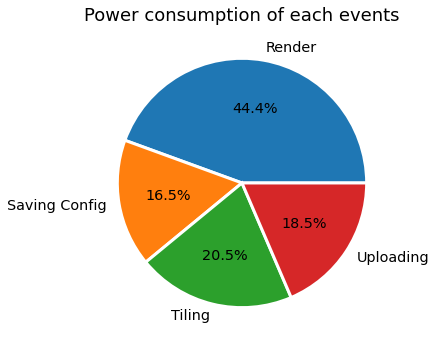

In [152]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(powerDraw.powerDrawWatt, labels=powerDraw.eventName, autopct='%.1f%%',
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'w'},
       textprops={'size': 'x-large'})
ax.set_title('Power consumption of each events', fontsize=18)
plt.tight_layout()

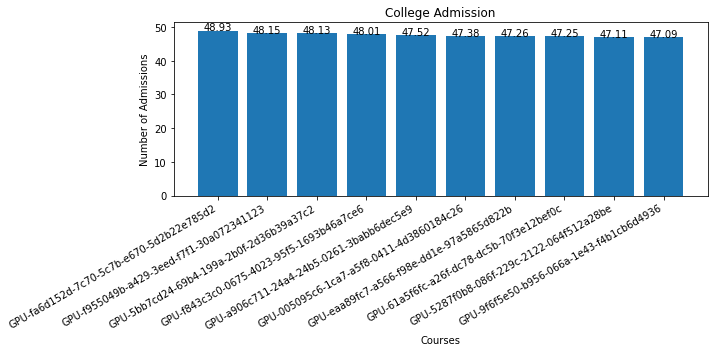

In [ ]:
# importing library
import matplotlib.pyplot as plt
  
# function to add value labels


  
if __name__ == '__main__':
    
    # creating data on which bar chart will be plot
    x = avgtemp.gpuUUID
    y = avgtemp.gpuTempC
      
    # setting figure size by using figure() function 
    plt.figure(figsize = (10,5))
      
    # making the bar chart on the data
    plt.bar(x, y)
      
    # calling the function to add value labels
    #addlabels(x, y)
      
    plt.xticks(rotation=30, ha='right')  
    # giving title to the plot
    plt.title("College Admission")
      
    # giving X and Y labels
    plt.xlabel("Courses")
    plt.ylabel("Number of Admissions")
    
    for i in range(len(x)):
      plt.text(i, y.iloc[i],round(y.iloc[i],2), ha = 'center') 
      
    # visualizing the plot
    plt.show()

In [ ]:
#y.iloc[0,1]
y.iloc[0]

48.92671552298468

0 48.92671552298468
1 48.153231179213854
2 48.12892451569806
3 48.00867244829887
4 47.523046092184366
5 47.37908061292472
6 47.25516322451699
7 47.24749833222148
8 47.10933333333333
9 47.08860759493671


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


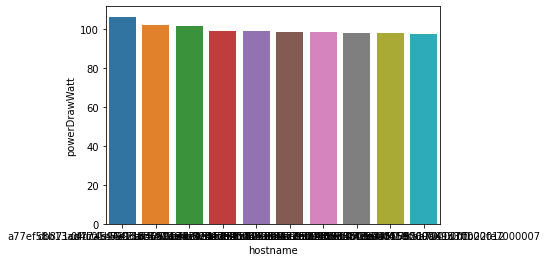

In [ ]:
p = sns.barplot('hostname', 'powerDrawWatt', data=avghostpower, ci=False)

In [ ]:
plt.bar(q_1_4.eventName, q_1_4.delta_dttm, label="Blue Bar", color='b')

plt.plot()

plt.xlabel("bar number")
plt.ylabel("bar height")
plt.title("Bar Chart Example")
plt.legend()
plt.show()

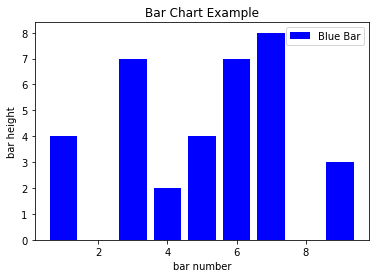

In [ ]:
import matplotlib.pyplot as plt

# Look at index 4 and 6, which demonstrate overlapping cases.
x1 = [1, 3, 4, 5, 6, 7, 9]
y1 = [4, 7, 2, 4, 7, 8, 3]

# Colors: https://matplotlib.org/api/colors_api.html

plt.bar(x1, y1, label="Blue Bar", color='b')
plt.plot()

plt.xlabel("bar number")
plt.ylabel("bar height")
plt.title("Bar Chart Example")
plt.legend()
plt.show()